In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('../../results/Overview_models.csv')
df1 = df[['Name', 'notes']]
pd.set_option("max_colwidth", None)
display(df1)

,Name,notes
0,Temporal4DFlowNet_20230210-0333,NaN
1,Temporal4DFlowNet_20230215-1029,NaN
2,Temporal4DFlowNet_20230217-0602,NaN
3,Temporal4DFlowNet_20230220-0908,NaN
4,Temporal4DFlowNet_20230301-1127,First training on radial sampled data
...,...,...
162,Temporal4DFlowNet_20250502-1152,"Jessi , (5, 12, 12)"
163,Temporal4DFlowNet_20250502-1354,"Jessi , (5, 12, 12)"
164,Temporal4DFlowNet_20250502-1741,"Jessi , (16, 16, 16)"
165,Temporal4DFlowNet_20250602-1819,"Jessi , (5, 12, 12)"


: 

Loading  ../../models/Temporal4DFlowNet_20241018-1552/loss.csv
Loading  ../../models/Temporal4DFlowNet_20250502-1741/loss.csv


/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same argument

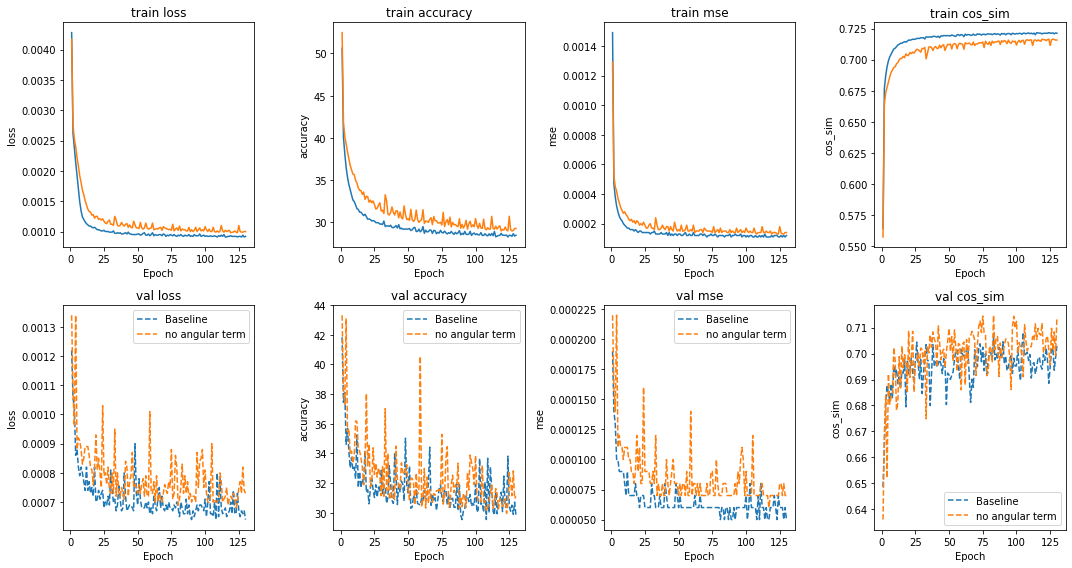

In [12]:
# model_names  = ['Temporal4DFlowNet_20240709-2057', 'Temporal4DFlowNet_20240827-1704', 'Temporal4DFlowNet_20240827-1709', 'Temporal4DFlowNet_20240827-1711', 'Temporal4DFlowNet_20240827-1713']
# descriptions = ['Baseline, a=0.8', 'lr decay', 'a=0.5', 'a=0.9', 'a=0.95']

model_names = ['Temporal4DFlowNet_20241018-1552' ,'Temporal4DFlowNet_20250502-1741']
descriptions = ['Baseline', 'no angular term']
plotting_metrics = ['loss', 'accuracy',	'mse', 'cos_sim']
N_metrics = len(plotting_metrics)

show_epochs = np.index_exp[:]


def load_lossdata(file, skiprows =4, skipfooter =4):
    print('Loading ', file)
    df_loss = pd.read_csv(file,  skiprows = skiprows, skipfooter = skipfooter, engine = 'python')
    return df_loss


plt.figure(figsize=(15, 8))

for i, model_name in enumerate(model_names):
    df_loss = load_lossdata('../../models/' + model_name + '/loss.csv')
    df_loss.columns = df_loss.columns.str.strip()


    # make a plot for each metric
    for m, metric in enumerate(plotting_metrics):
        
        plt.subplot(2, N_metrics, m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'train_{metric}'][show_epochs], '-', label=descriptions[i], color='C'+str(i))
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'train {metric}')
        # plt.legend()
        plt.subplot(2, N_metrics, N_metrics+m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'val_{metric}'][show_epochs], '--', label=descriptions[i], color='C'+str(i))
        # plt.yscale('log')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'val {metric}')
        plt.legend()
plt.legend()
plt.tight_layout()

Loading  ../../models/Temporal4DFlowNet_20241018-1552/loss.csv
Loading  ../../models/Temporal4DFlowNet_20250502-1741/loss.csv


/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/proj/multipress/users/x_piaca/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarnin

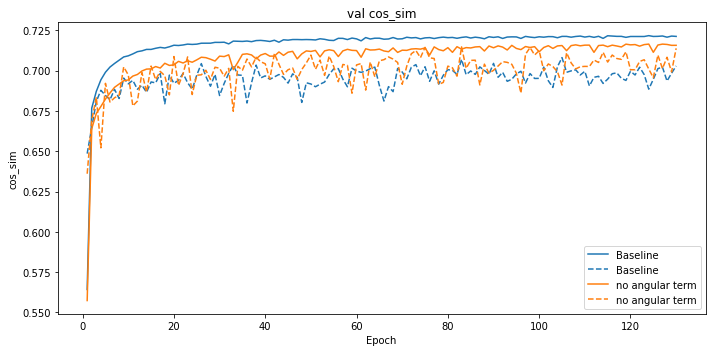

In [3]:
# plot in the same plot
plotting_metrics = [ 'cos_sim']
N_metrics = len(plotting_metrics)

plt.figure(figsize=(10, 5))

for i, model_name in enumerate(model_names):
    df_loss = load_lossdata('../../models/' + model_name + '/loss.csv')
    df_loss.columns = df_loss.columns.str.strip()


    # make a plot for each metric
    for m, metric in enumerate(plotting_metrics):
        
        plt.subplot(1, N_metrics, m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'train_{metric}'][show_epochs], '-', label=descriptions[i], color='C'+str(i))
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'train {metric}')
        # plt.legend()
        plt.subplot(1, N_metrics, m+1)
        plt.plot(df_loss['epoch'][show_epochs], df_loss[f'val_{metric}'][show_epochs], '--', label=descriptions[i], color='C'+str(i))
        # plt.yscale('log')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.title(f'val {metric}')
        plt.legend()
plt.legend()
plt.tight_layout()

# Plotting Jessis trainings curves

True
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250727-0129_FlowNet/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250727-0128_FlowNet_3Dnested/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250721-0706_FlowNet_31/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250724-2258_FlowNet_Hypercross/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250720-1639_FlowNet_sparse_new/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250728-0820_FlowNet_3Dnested_31/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250724-1503_FlowNet/loss.csv
Loading  ../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison/20250723-0919_FlowNet_3Dnested/loss.csv
Inde

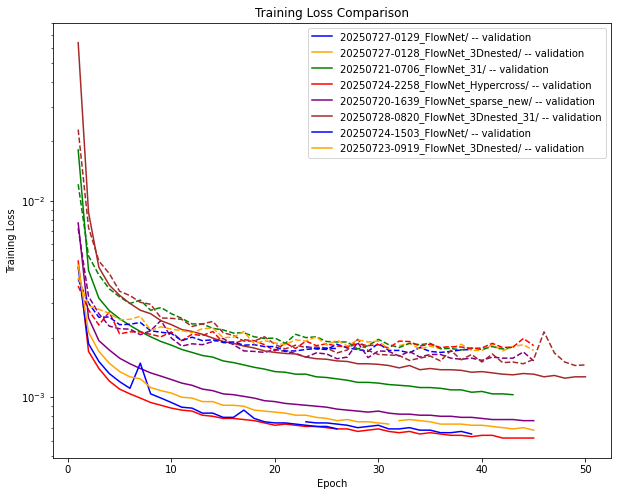

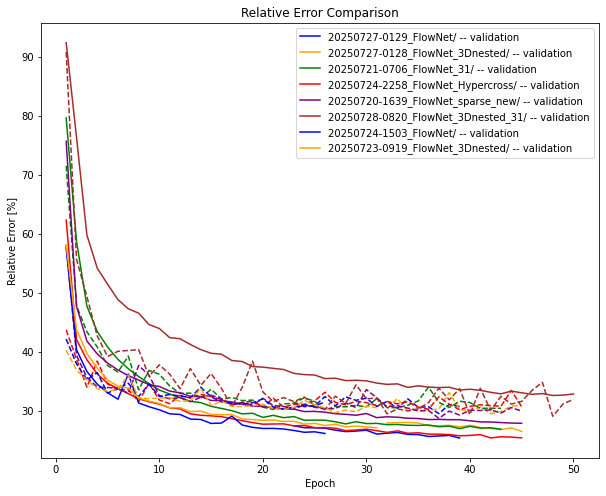

In [22]:
import os 

model_dir = "../../../../x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison" #users/x_jessc/Sparse4DFlowNetSpatiotemporal/models/20250727-Comparison
nn_names = [
    "20250727-0129_FlowNet", '20250727-0128_FlowNet_3Dnested', '20250721-0706_FlowNet_31', '20250724-2258_FlowNet_Hypercross', "20250720-1639_FlowNet_sparse_new", '20250728-0820_FlowNet_3Dnested_31', 
    "20250724-1503_FlowNet", "20250723-0919_FlowNet_3Dnested"
]
loss_values = {}

print(os.path.isdir(model_dir))
for neural_network in nn_names:
    if neural_network in ["20250727-0129_FlowNet", "20250724-1503_FlowNet", "20250723-0919_FlowNet_3Dnested",'20250721-0706_FlowNet_31' ]:
        loss= load_lossdata(f"{model_dir}/{neural_network}/loss.csv", skiprows=7, skipfooter=0)
    else:
        loss = load_lossdata(f"{model_dir}/{neural_network}/loss.csv", skiprows=7, skipfooter=4)
    loss_values[neural_network] = loss

print(loss_values[nn_names[0]].keys())
# now plot 

import matplotlib.pyplot as plt

color = ["blue", "orange", "green", "red", "purple", "brown","blue", "orange" ]
plt.figure(figsize=(10, 8))
for i, (neural_network, loss) in enumerate(loss_values.items()):
    if "1503_FlowNet" in neural_network or "0129_FlowNet" in neural_network or "20250721-0706_FlowNet_31" in neural_network or "FlowNet_3Dnested" in neural_network:
        print(neural_network)
        print(list(loss['epoch']))
        print("------------")

    plt.plot(loss['epoch'], loss[' train_loss'], label=f"{neural_network}/ -- validation", color=color[i])
    plt.plot(loss['epoch'], loss['val_loss'], linestyle='--', color=color[i])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
# log y scale
plt.yscale('log')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()

# also plot relative error
plt.figure(figsize=(10, 8))
for i, (neural_network, loss) in enumerate(loss_values.items()):
    plt.plot(loss['epoch'], loss['train_relativerError'], label=f"{neural_network}/ -- validation", color=color[i])
    plt.plot(loss['epoch'], loss['val_relativerError'],  linestyle='--', color=color[i])
plt.xlabel('Epoch')
plt.ylabel('Relative Error [%]')
plt.title('Relative Error Comparison')
plt.legend()